<h1 align='center'>Bank marketing data classification</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv(r'bank-additional-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


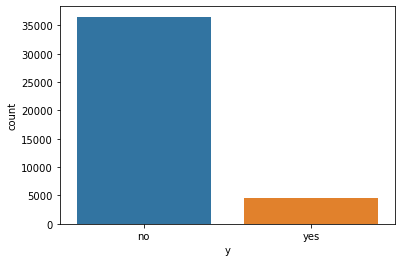

In [9]:
sns.countplot(x='y', data=data)
plt.show()

In [10]:
data.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [11]:
categorical_columns = data.columns[data.dtypes == np.object]

In [12]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
numerical_columns = data.columns[~(data.dtypes == np.object)]

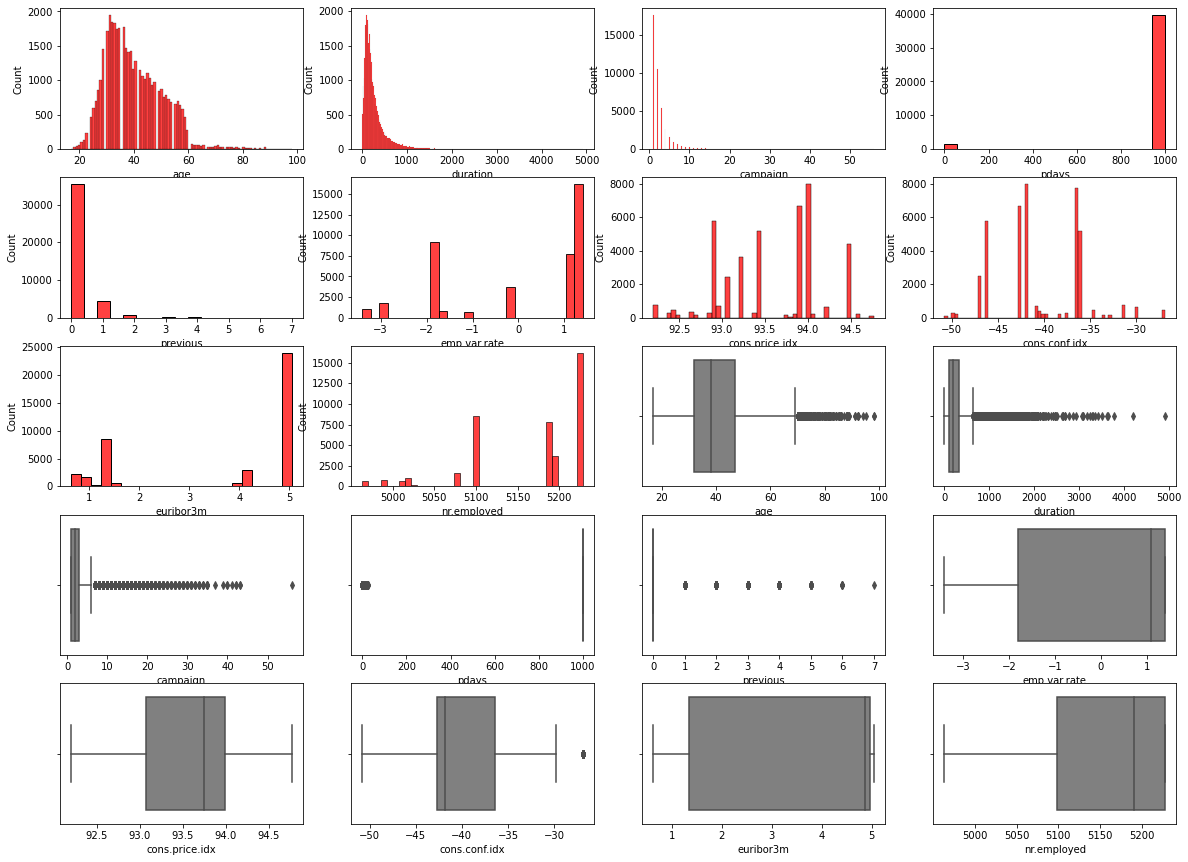

In [14]:
fig, ax = plt.subplots(5, 4, figsize=(20, 15))
axlist = ax.flatten()
for i in range(len(numerical_columns)):
    sns.histplot(x=numerical_columns[i], data=data, color='red', ax=axlist[i])
    sns.boxplot(x=numerical_columns[i], data=data, color='gray', ax=axlist[i + 10])
    axlist[i].set(xlabel=numerical_columns[i])
    axlist[i+10].set(xlabel=numerical_columns[i])
    

In [15]:
def outlier_removal(dataframe, column):
    Q1 = np.percentile(dataframe[column], 0.20)
    Q3 = np.percentile(dataframe[column], 0.80)
    IQR = Q3-Q1
    return dataframe[(dataframe[column] > (Q3 + 1.5*IQR)) | (dataframe[column] < (Q1 - 1.5*IQR))]

In [16]:
df = outlier_removal(data, 'age')
df = outlier_removal(data, 'duration')

In [17]:
df.shape

(40385, 21)

In [18]:
categorical_columns = categorical_columns.drop('y')

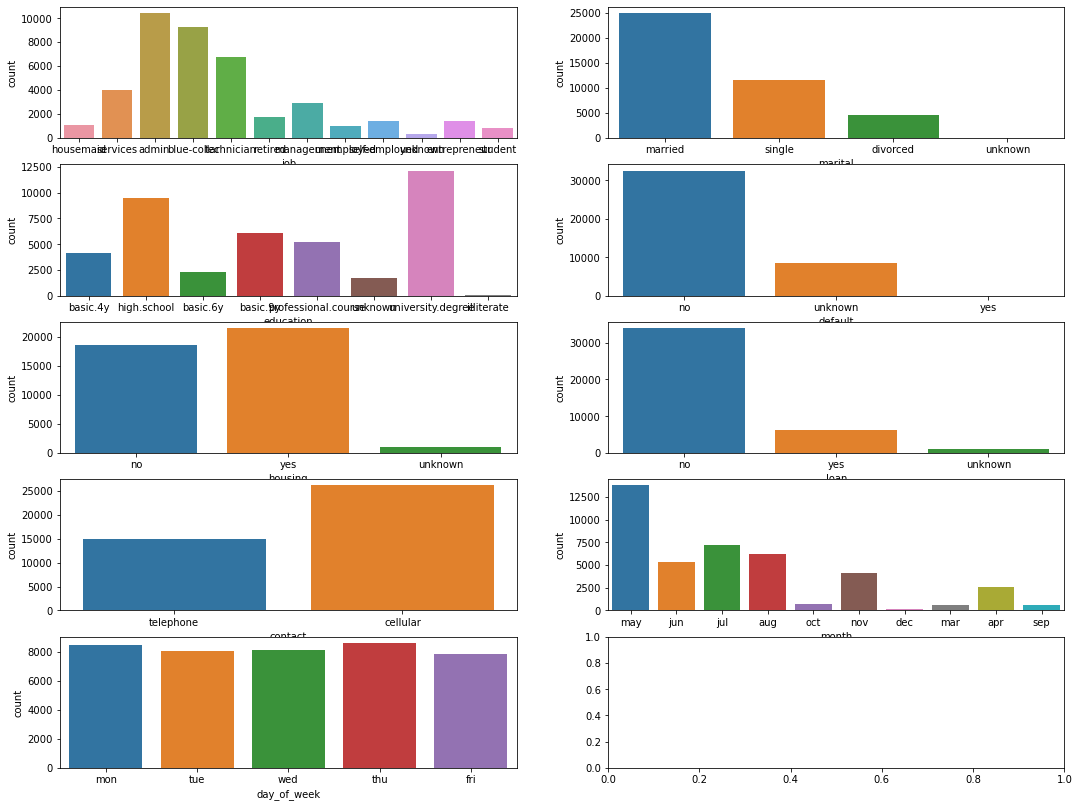

In [19]:
fig, ax = plt.subplots(5, 2, figsize=(18, 14))
axlist = ax.flatten()
for i in range(len(categorical_columns) - 1):
    sns.countplot(x=categorical_columns[i], data=data, ax=axlist[i])

In [20]:
ordinalcolumns = ['job', 'marital', 'education', 'month', 'day_of_week', 'default', 'housing', 'loan']
nominalcolumns = set(categorical_columns) - set(ordinalcolumns)

In [21]:
cat_list = [['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student', 'unknown'], ['single', 'married', 'divorced', 'unknown'], ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'illiterate', 'university.degree',
       'unknown'], 
 ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
 ['mon', 'tue', 'wed', 'thu', 'fri'],
 ['yes', 'no', 'unknown'],
 ['yes', 'no', 'unknown'],
 ['yes', 'no', 'unknown']]

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [23]:
Oh = OneHotEncoder(drop='first')
Le = LabelEncoder()
Oe = OrdinalEncoder(categories=cat_list)

In [24]:
df[ordinalcolumns] = Oe.fit_transform(df[['job', 'marital', 'education', 'month', 'day_of_week', 'default', 'housing', 'loan']])

In [25]:
nominalcolumns

{'contact', 'poutcome'}

In [26]:
col_list = list()
for i in nominalcolumns:
    col_list += [i+str(j) for j in range(1, len(df[i].unique()))]
one_hotframe = pd.DataFrame(Oh.fit_transform(df[nominalcolumns]).toarray(), columns=col_list)

In [27]:
df.index = range(df.shape[0])

In [28]:
df = pd.concat([df, one_hotframe], axis=1)
df.drop(nominalcolumns, axis=1, inplace=True)

<AxesSubplot:>

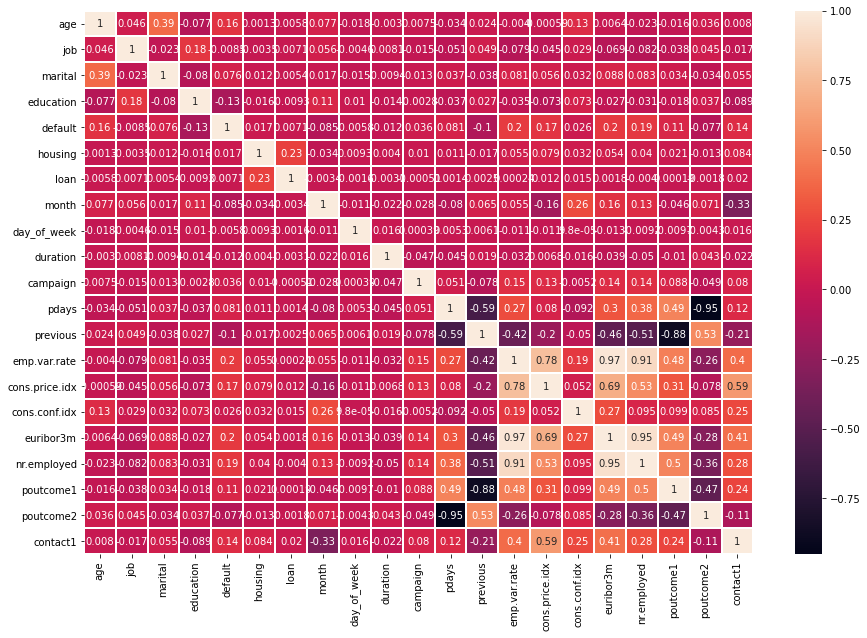

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=1)

In [29]:
correlated_features =['euribor3m', 'nr.employed']

In [30]:
X = df.drop('y', axis=1)
y = (df.y == 'yes').astype(int)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
Strat_split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
train_indices, test_indices = next(Strat_split.split(X, y))

In [33]:
X_train, y_train = X.loc[train_indices, :], y.loc[train_indices]
X_test, y_test = X.loc[test_indices, :], y.loc[test_indices]

In [34]:
df2 = df.copy()
df2['age'] = pd.cut(df2['age'], bins=15)

In [35]:
df2['age'] = Le.fit_transform(df2['age'])

In [36]:
X_cat = df2.drop('y', axis=1)
y_cat = (df2.y == 'yes').astype(int)

In [37]:
X_train_cat, y_train_cat= X_cat.loc[train_indices, :], y_cat.loc[train_indices]
X_test_cat, y_test_cat = X_cat.loc[test_indices, :], y_cat.loc[test_indices]

In [38]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

In [39]:
def evaluate(X_test, y_true, est, datastr=None):
    y_pred = est.predict(X_test)
    print('accuracy :', accuracy_score(y_true, y_pred))
    print()
    print(classification_report(y_true, y_pred))
    print()
    sns.heatmap(confusion_matrix(y_true, y_pred), fmt='d', annot=True, cmap='twilight_shifted', linewidths=1)
    print()
    plt.style.use('ggplot')
    probs = est.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, probs[:, 1])
    precision, recall, thresholds = precision_recall_curve(y_test, probs[:, 1])
    def plot_characteristics(fpr, tpr, precision, recall):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        axes[0].plot([0, 1], [0, 1], ls='--', color='k')
        axes[0].plot(fpr, tpr, color='red', lw=2)
        axes[0].set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve')
        axes[1].plot(recall, precision, color='blue', lw=2)
        axes[1].set(xlabel='Recall', ylabel='Precision', title='Precision-recall curve')
        plt.tight_layout()
        plt.show()
    plot_characteristics(fpr, tpr, precision, recall)
    print()
    print('roc_auc:', roc_auc_score(y_true, y_pred
                       ))
    print('AUC:', auc(fpr, tpr))
    summary_frame = {'estimator':est, 'ROC_AUC':roc_auc_score(y_true, y_pred), 'AUC':auc(fpr, tpr), 'accuracy':accuracy_score(y_true, y_pred),
                      'precision':precision_score(y_true, y_pred), 'recall':recall_score(y_true, y_pred), 'data':datastr}
    return pd.Series(summary_frame)
    

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
Mm = MinMaxScaler()
X_train_scaled = pd.DataFrame(Mm.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(Mm.transform(X_test), columns=X.columns)

### Model building 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [43]:
Lr = LogisticRegression()

In [44]:
param_grid = {'penalty':['l1', 'l2'], 'C':[0.001, 1, 10, 5.6, 2.8, 20, 100]}
GdLr = GridSearchCV(estimator=Lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1') 
GdLr = GdLr.fit(X_train_scaled, y_train)

accuracy : 0.9087532499690479

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7149
           1       0.67      0.40      0.50       928

    accuracy                           0.91      8077
   macro avg       0.80      0.69      0.73      8077
weighted avg       0.90      0.91      0.90      8077





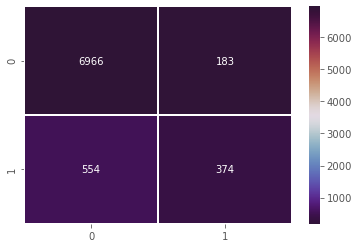

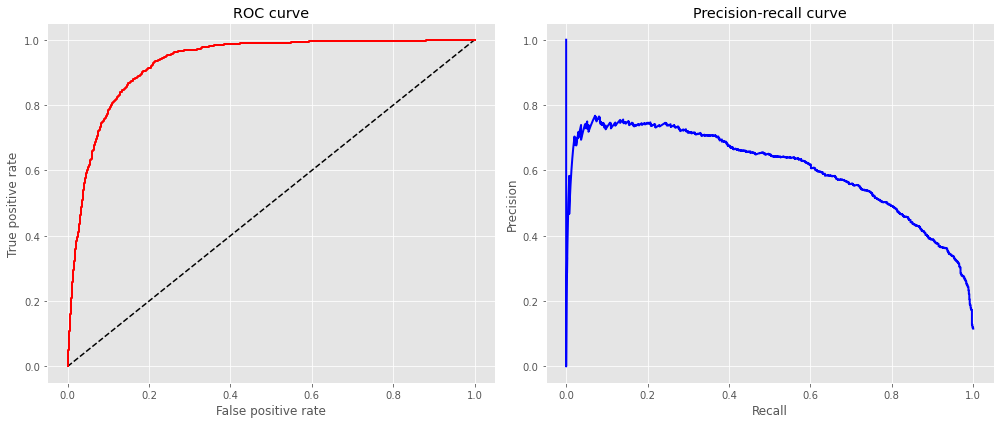


roc_auc: 0.68870962782352
AUC: 0.929881228867312


In [51]:
Lr_stats1 = evaluate(X_test_scaled, y_test, GdLr.best_estimator_, ('X_train_scaled', 'X_test_scaled'))


In [52]:
model = GdLr.best_estimator_

In [53]:
X_train_cat_scaled = Mm.fit_transform(X_train_cat)
X_test_cat_scaled = Mm.transform(X_test)

In [54]:
model = model.fit(X_train_cat_scaled, y_train_cat)

accuracy : 0.9077627832115884

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7149
           1       0.60      0.61      0.60       928

    accuracy                           0.91      8077
   macro avg       0.77      0.78      0.78      8077
weighted avg       0.91      0.91      0.91      8077





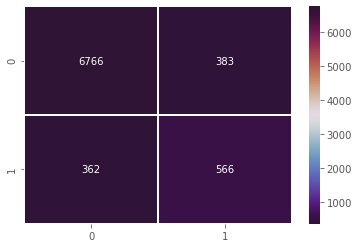

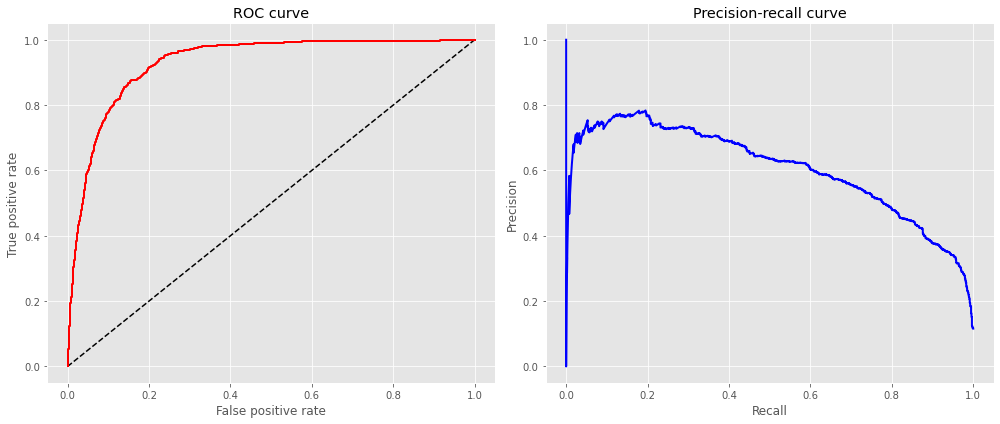


roc_auc: 0.7781699333400862
AUC: 0.928968694681195


In [55]:
Lr_stats2 = evaluate(X_test_cat_scaled, y_test, model, ('X_train_cat_scaled', 'X_test_cat_scaled'))

In [57]:
summaries = []
summaries +=[Lr_stats1, Lr_stats2]


In [83]:
pd.concat(summaries, axis=1
         )

,0,1,2,3,4
estimator,LogisticRegression(C=100),LogisticRegression(C=100),"KNeighborsClassifier(n_neighbors=17, weights='...","KNeighborsClassifier(n_neighbors=17, weights='...","DecisionTreeClassifier(max_depth=7, max_featur..."
ROC_AUC,0.68871,0.77817,0.612546,0.758276,0.763571
AUC,0.929881,0.928969,0.753024,0.826125,0.930792
accuracy,0.908753,0.907763,0.885973,0.815278,0.913458
precision,0.671454,0.596417,0.507431,0.346238,0.638452
recall,0.403017,0.609914,0.257543,0.684267,0.568966
data,"(X_train_scaled, X_test_scaled)","(X_train_cat_scaled, X_test_cat_scaled)",None,"(X_train_up, X_test_scaled)",None


In [60]:
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss

In [61]:
Nm = NearMiss(version=3, n_neighbors=5)
tl = TomekLinks()
sm = SMOTE(sampling_strategy=0.9)
ad = ADASYN()
X_train_cat_sampled, y_train_sampled = tl.fit_resample(X_train_cat_scaled,  y_train_cat)

In [62]:
X_train_cat_up, y_train_cat_up = sm.fit_resample(X_train_cat_scaled, y_train_cat)

In [63]:
model = model.fit(X_train_cat_up, y_train_cat_up)

accuracy : 0.7245264330815897

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      7149
           1       0.29      0.97      0.45       928

    accuracy                           0.72      8077
   macro avg       0.64      0.83      0.63      8077
weighted avg       0.91      0.72      0.77      8077





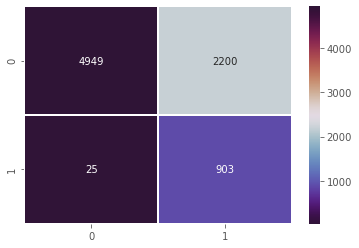

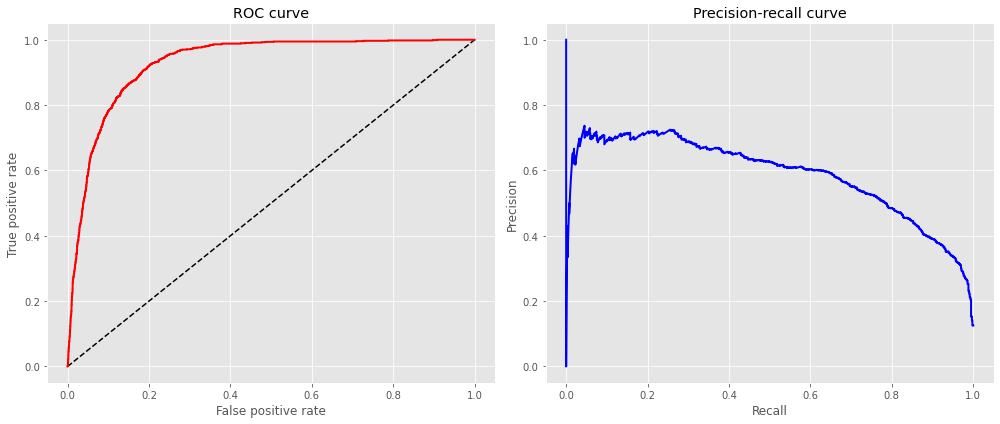


roc_auc: 0.8326624986132616
AUC: 0.929088526970254


estimator    LogisticRegression(C=100)
ROC_AUC                       0.832662
AUC                           0.929089
accuracy                      0.724526
precision                     0.291009
recall                         0.97306
data                              None
dtype: object

In [64]:
evaluate(X_test_cat_scaled, y_test_cat, model)

## K nearest neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [66]:
param_grid = {'n_neighbors':range(4, 18), 'weights':['uniform', 'distance']}
Gdknn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5)

In [67]:
Gdknn = Gdknn.fit(X_train_cat_scaled, y_train_cat)

accuracy : 0.8859725145474805

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7149
           1       0.51      0.26      0.34       928

    accuracy                           0.89      8077
   macro avg       0.71      0.61      0.64      8077
weighted avg       0.86      0.89      0.87      8077





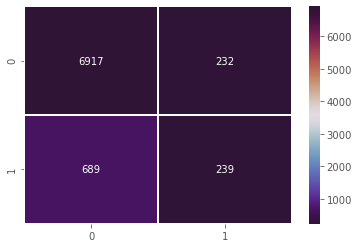

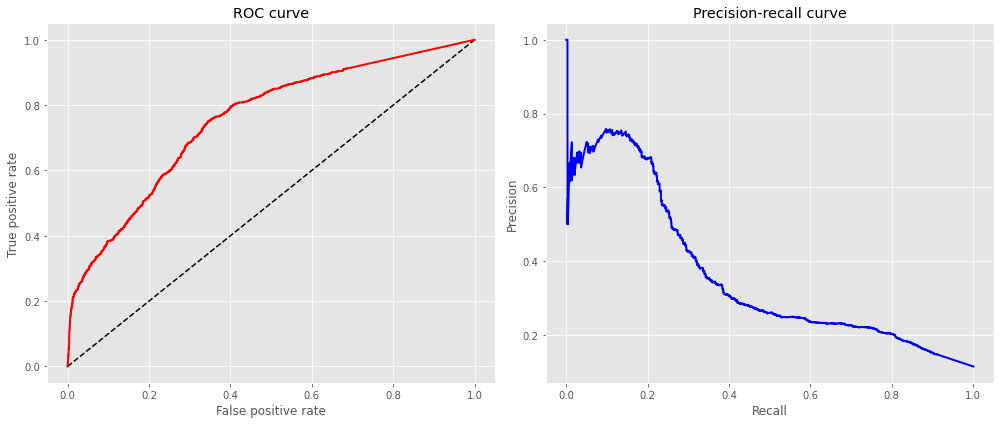


roc_auc: 0.6125455061233546
AUC: 0.7530238434601415


In [68]:
Knn_stats1 = evaluate(X_test_cat_scaled, y_test_cat, Gdknn.best_estimator_)
summaries += [Knn_stats1]

In [69]:
from imblearn.over_sampling import SMOTE

accuracy : 0.816392224835954

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7149
           1       0.35      0.69      0.46       928

    accuracy                           0.82      8077
   macro avg       0.65      0.76      0.68      8077
weighted avg       0.88      0.82      0.84      8077





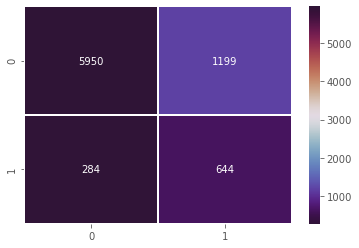

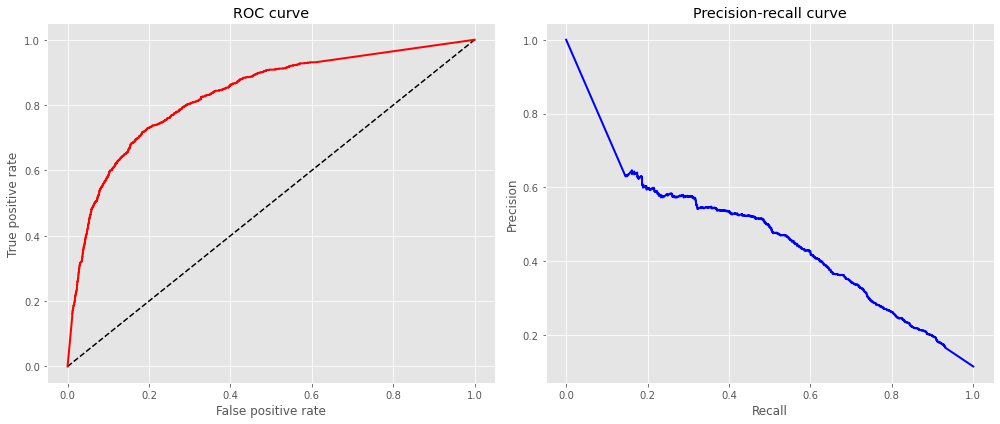


roc_auc: 0.7631248763994001
AUC: 0.8312555620270016


In [91]:
sm = SMOTE()
X_train_up, y_train_up = sm.fit_resample(X_train_scaled, y_train)
model = Gdknn.best_estimator_
model = model.fit(X_train_up, y_train_up)
Knn_stats2 = evaluate(X_test_scaled, y_test, model, ('X_train_up', 'X_test_scaled'))

In [71]:
summaries += [Knn_stats2]

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtc = DecisionTreeClassifier(random_state=24)
dtc = dtc.fit(X_train_cat, y_train)

accuracy : 0.8482109694193388

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7149
           1       0.38      0.50      0.43       928

    accuracy                           0.85      8077
   macro avg       0.65      0.69      0.67      8077
weighted avg       0.87      0.85      0.86      8077





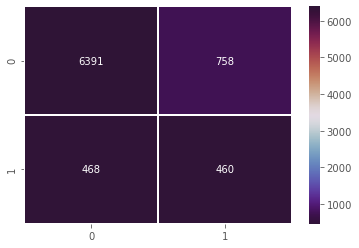

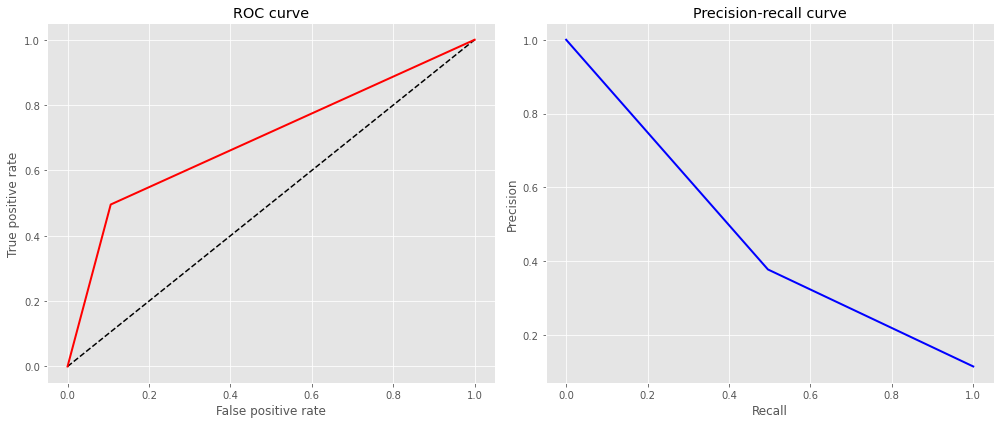


roc_auc: 0.694830419976751
AUC: 0.694830419976751


estimator    DecisionTreeClassifier(random_state=24)
ROC_AUC                                      0.69483
AUC                                          0.69483
accuracy                                    0.848211
precision                                   0.377668
recall                                       0.49569
data                                            None
dtype: object

In [74]:
evaluate(X_test, y_test, dtc)

In [75]:
param_grid = {'max_depth':range(1, dtc.tree_.max_depth+1, 2),
              'max_features':range(1, len(dtc.feature_importances_)+1)}
gddtc= GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='f1', n_jobs=-1, cv=5)

In [76]:
gddtc = gddtc.fit(X_train_cat, y_train_cat)

accuracy : 0.9134579670669803

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7149
           1       0.64      0.57      0.60       928

    accuracy                           0.91      8077
   macro avg       0.79      0.76      0.78      8077
weighted avg       0.91      0.91      0.91      8077





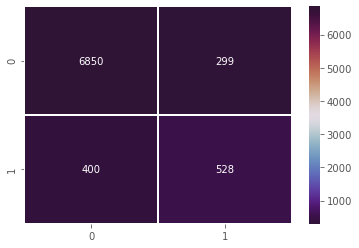

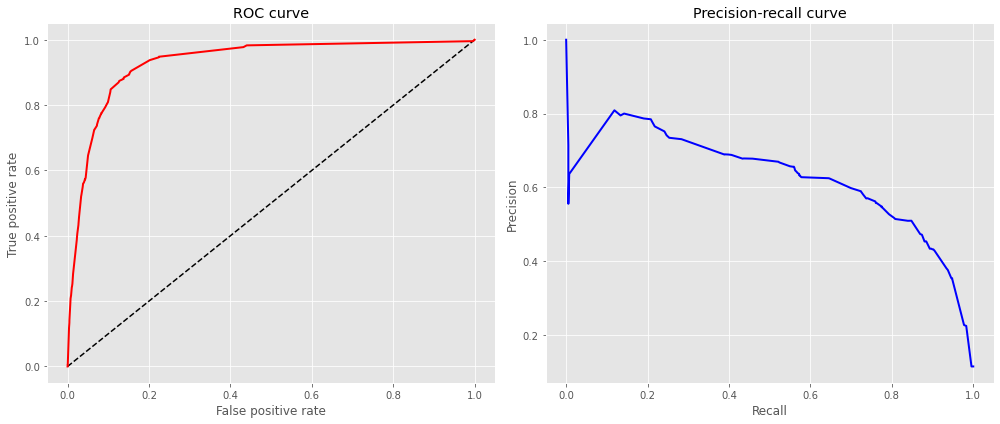


roc_auc: 0.7635707429541629
AUC: 0.9307917281655017


In [77]:
dtc_1 = evaluate(X_test_cat, y_test_cat, gddtc.best_estimator_)
summaries += [dtc_1]

In [78]:
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem

In [79]:
param_grid = {'C':[100, 1000,0.1,  5.6], 'gamma':[0.1, 1, 10]}
Gdsvc = GridSearchCV(param_grid=param_grid, estimator=SVC(kernel='rbf', probability=True), n_jobs=-1, cv=2, scoring='f1')

In [80]:
Gdsvc = Gdsvc.fit(X_train_cat_scaled, y_train_cat)

In [84]:
print(Gdsvc.best_estimator_)

SVC(C=1000, gamma=0.1, probability=True)


In [92]:
model = Gdsvc.best_estimator_
model = model.fit(X_train_up, y_train_up)


accuracy : 0.8842391977219265

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7149
           1       0.36      0.01      0.02       928

    accuracy                           0.88      8077
   macro avg       0.62      0.50      0.48      8077
weighted avg       0.83      0.88      0.83      8077





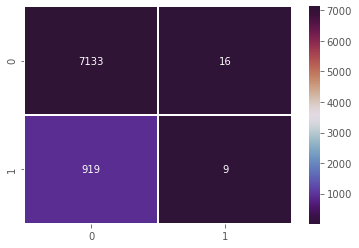

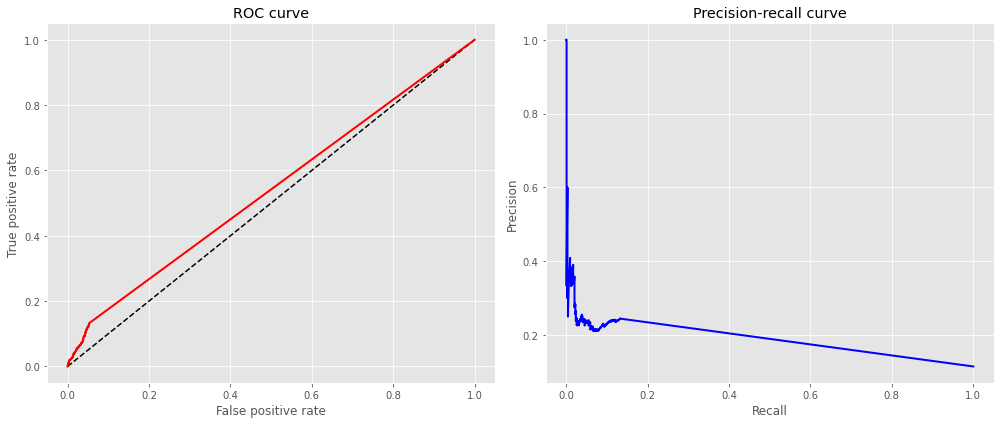


roc_auc: 0.5037301003033943
AUC: 0.5394613003506639


In [94]:
svm1 = evaluate(X_test_cat_scaled, y_test_cat, model, ('X_train_cat_scaled', 'X_test_cat_scaled'))

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
param_grid = {'n_estimators':[50, 100, 200, 300, 400], 'max_features':[6, 8, 10, 14, 20], 'max_leaf_nodes':[8, 10, 14, 28]}
Gdrf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

In [97]:
Gdrf = Gdrf.fit(X_train_cat, y_train_cat)

accuracy : 0.9151912838925343

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7149
           1       0.65      0.58      0.61       928

    accuracy                           0.92      8077
   macro avg       0.80      0.77      0.78      8077
weighted avg       0.91      0.92      0.91      8077





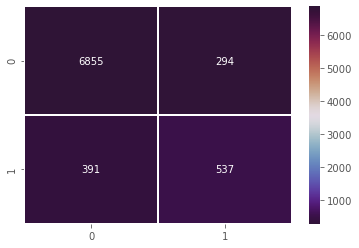

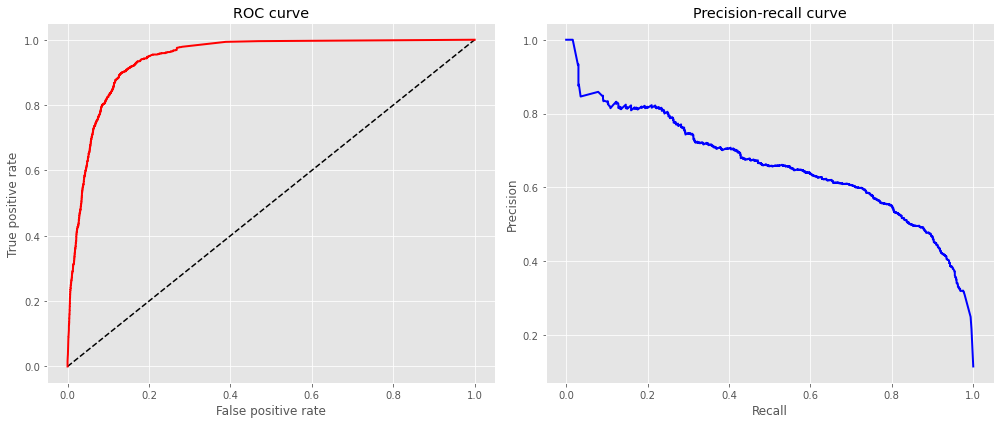


roc_auc: 0.768769580143835
AUC: 0.9424159877677611


In [98]:
rf1 = evaluate(X_test_cat, y_test_cat, Gdrf.best_estimator_)

In [99]:
from sklearn.ensemble import  ExtraTreesClassifier

In [100]:
et = ExtraTreesClassifier(bootstrap=True, random_state=24, oob_score=True, max_samples=0.9)
param_grid = {'n_estimators':[50, 100, 200, 300, 400], 'max_leaf_nodes':[8, 10, 14, 28, 32]}
gdet = GridSearchCV(param_grid=param_grid, n_jobs=-1, estimator=et, cv=5, scoring='f1')

In [102]:
gdet = gdet.fit(X_train_cat, y_train_cat)

accuracy : 0.9018199826668317

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7149
           1       0.76      0.21      0.33       928

    accuracy                           0.90      8077
   macro avg       0.84      0.60      0.64      8077
weighted avg       0.89      0.90      0.88      8077





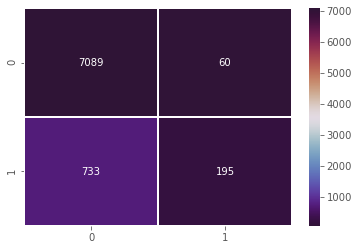

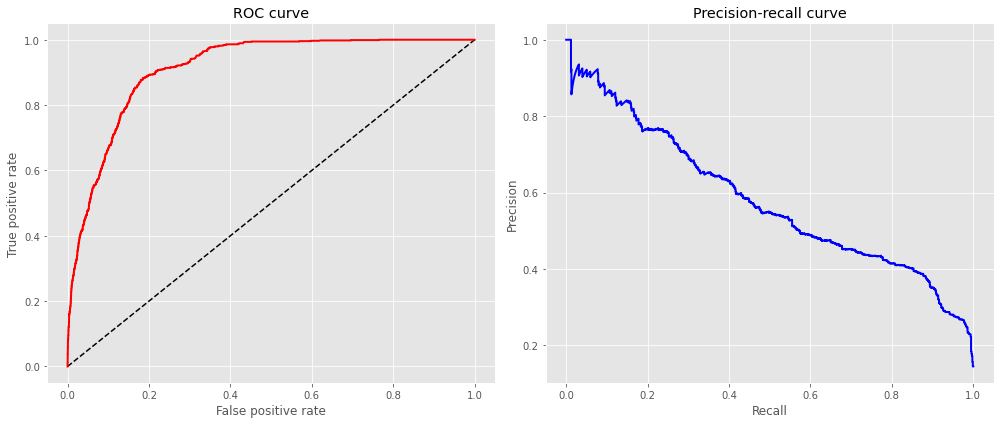


roc_auc: 0.6008682640687629
AUC: 0.9123646121232292


In [63]:
evaluate(X_test_cat, y_test_cat, gdet)

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001,],
              'subsample': [1.0, 0.6],
              'max_features': [10, 15, 20]}
Gdgb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=24), param_grid=param_grid, verbose=1, cv=5, scoring='roc_auc', n_jobs=-1)

In [122]:
correlated_features = ['euribor3m', 'emp.var.rate', 'duration']

In [125]:
Gdgb = Gdgb.fit(X_train_cat, y_train_cat)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


accuracy : 0.9174198340968182

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7149
           1       0.67      0.54      0.60       928

    accuracy                           0.92      8077
   macro avg       0.81      0.75      0.78      8077
weighted avg       0.91      0.92      0.91      8077





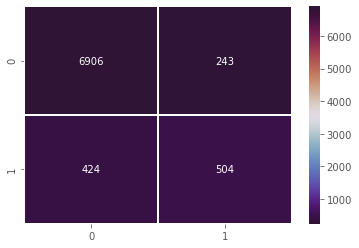

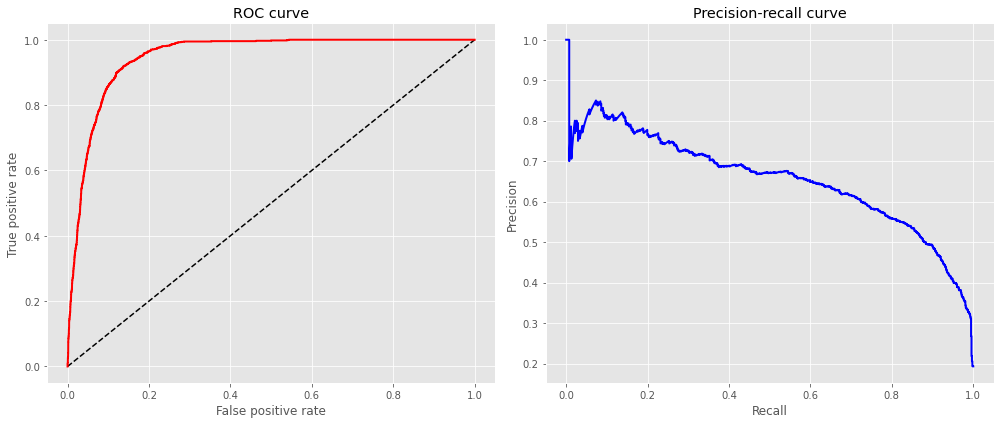


roc_auc: 0.7545563401681451
AUC: 0.9483416567786187


estimator    ([DecisionTreeRegressor(criterion='friedman_ms...
ROC_AUC                                               0.754556
AUC                                                   0.948342
accuracy                                               0.91742
precision                                             0.674699
recall                                                0.543103
data                                                      None
dtype: object

In [127]:
evaluate(X_test_cat, y_test, Gdgb.best_estimator_)

In [110]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

In [111]:
sm = ADASYN(random_state=42)
tl = TomekLinks()

In [112]:
X_train_sampled, y_train_sampled = tl.fit_resample(X_train_cat, y_train_cat)
X_train_sampled, y_train_sampled = sm.fit_resample(X_train_sampled, y_train_sampled)

In [122]:
model = GdLr.best_estimator_.fit(X_train_sampled, y_train_sampled)

accuracy : 0.7995542899591432

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7149
           1       0.36      0.92      0.51       928

    accuracy                           0.80      8077
   macro avg       0.67      0.85      0.69      8077
weighted avg       0.91      0.80      0.83      8077





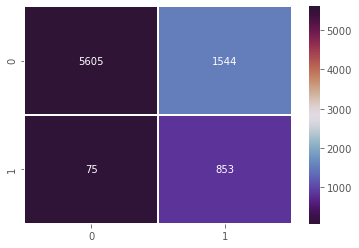

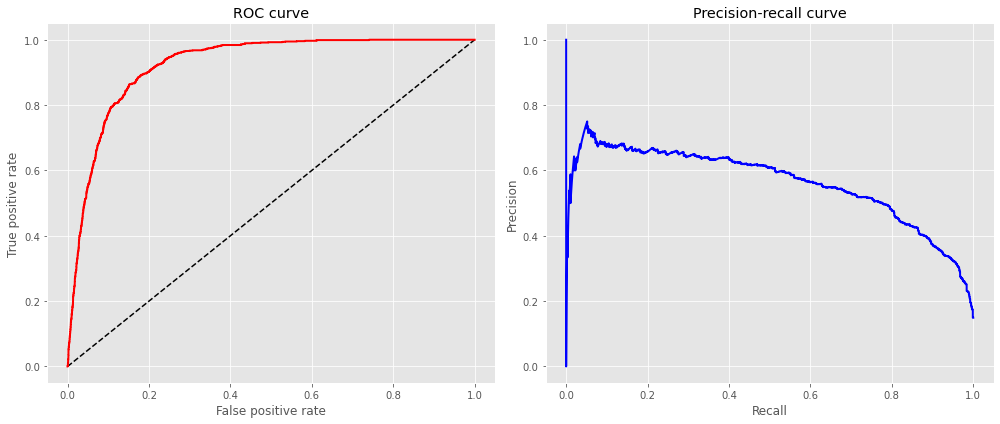


roc_auc: 0.8516033861740971
AUC: 0.9241701274834675


In [123]:
evaluate(X_test, y_test, model)

In [124]:
model = Gdrf.best_estimator_
model = model.fit(X_train_sampled, y_train_sampled)

accuracy : 0.8397920019809335

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7149
           1       0.41      0.94      0.57       928

    accuracy                           0.84      8077
   macro avg       0.70      0.88      0.74      8077
weighted avg       0.92      0.84      0.86      8077





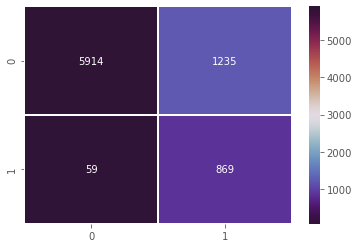

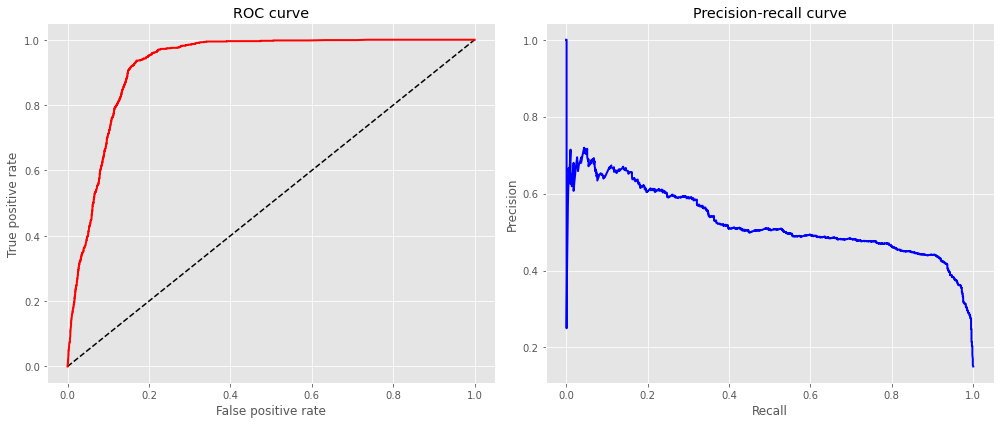


roc_auc: 0.8818354900130715
AUC: 0.9237870409895765


In [125]:
evaluate(X_test, y_test, model)

In [126]:
model = gdet.best_estimator_.fit(X_train_sampled, y_train_sampled)

accuracy : 0.8177541166274607

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7149
           1       0.36      0.74      0.48       928

    accuracy                           0.82      8077
   macro avg       0.66      0.78      0.69      8077
weighted avg       0.89      0.82      0.84      8077





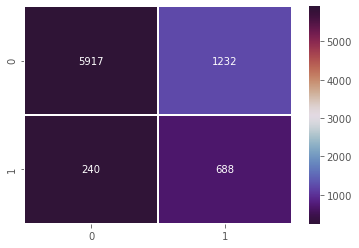

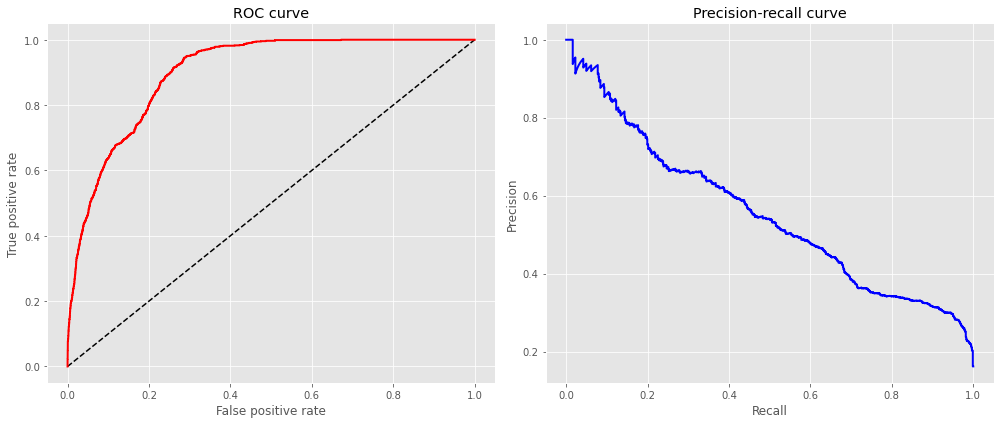


roc_auc: 0.7845237578441162
AUC: 0.9002714992692491


In [127]:
evaluate(X_test, y_test, model)

In [128]:
model = Gdgb.best_estimator_.fit(X_train_sampled, y_train_sampled)

accuracy : 0.9161817506499939

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7149
           1       0.63      0.68      0.65       928

    accuracy                           0.92      8077
   macro avg       0.79      0.81      0.80      8077
weighted avg       0.92      0.92      0.92      8077





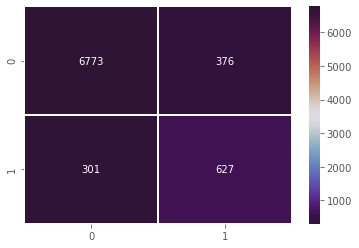

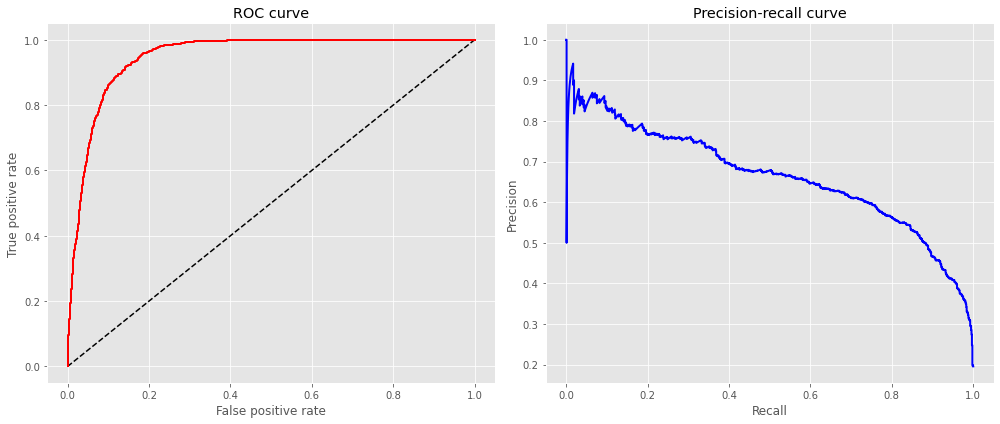


roc_auc: 0.8115258916125234
AUC: 0.9485937567829599


estimator    ([DecisionTreeRegressor(criterion='friedman_ms...
ROC_AUC                                               0.811526
AUC                                                   0.948594
accuracy                                              0.916182
precision                                             0.625125
recall                                                0.675647
data                                                      None
dtype: object

In [129]:
evaluate(X_test_cat, y_test_cat, model)

In [103]:
summaries += [rf1, svm1]

In [104]:
pd.concat(summaries, axis=1)

,0,1,2,3,4,5,6
estimator,LogisticRegression(C=100),LogisticRegression(C=100),"KNeighborsClassifier(n_neighbors=17, weights='...","KNeighborsClassifier(n_neighbors=17, weights='...","DecisionTreeClassifier(max_depth=7, max_featur...","(DecisionTreeClassifier(max_features=20, max_l...","SVC(C=1000, gamma=0.1, probability=True)"
ROC_AUC,0.68871,0.77817,0.612546,0.758276,0.763571,0.76877,0.50373
AUC,0.929881,0.928969,0.753024,0.826125,0.930792,0.942416,0.539461
accuracy,0.908753,0.907763,0.885973,0.815278,0.913458,0.915191,0.884239
precision,0.671454,0.596417,0.507431,0.346238,0.638452,0.646209,0.36
recall,0.403017,0.609914,0.257543,0.684267,0.568966,0.578664,0.00969828
data,"(X_train_scaled, X_test_scaled)","(X_train_cat_scaled, X_test_cat_scaled)",None,"(X_train_up, X_test_scaled)",None,None,"(X_train_cat_scaled, X_test_cat_scaled)"


In [130]:
from sklearn.ensemble import VotingClassifier

In [146]:
classifs = [('Gd', Gdgb.best_estimator_), ('LR', GdLr.best_estimator_)]

In [147]:
Vc = VotingClassifier(classifs, voting='soft', n_jobs=-1)

In [148]:
Vc = Vc.fit(X_train_cat, y_train_cat)

accuracy : 0.9128389253435681

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7149
           1       0.69      0.44      0.54       928

    accuracy                           0.91      8077
   macro avg       0.81      0.71      0.74      8077
weighted avg       0.90      0.91      0.90      8077





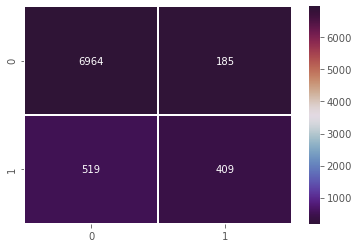

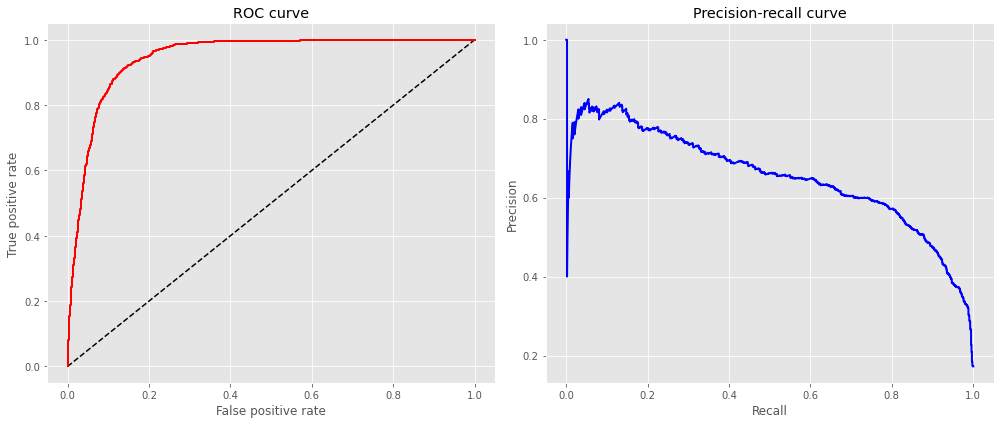


roc_auc: 0.7074275067407547
AUC: 0.946377236266466


In [177]:
V1 = evaluate(X_test_cat, y_test_cat, Vc, (X_train_cat, X_test_cat))